Beast Cancer Example:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

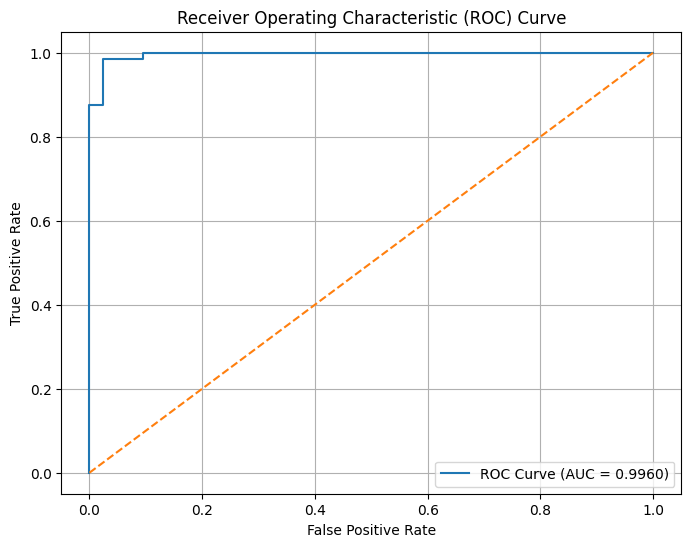

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# Step 1: Importing Necessary Libraries and Dataset
# -------------------------------------------------
# (siehe oben)

# Step 2: Loading and Understanding the Dataset
# ---------------------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display dataset information
print(X.info())
print(X.head())
print("Target Distribution:\n", y.value_counts())

# Step 3: Splitting Dataset into Training and Test Sets
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 4: Creating a Pipeline (Data Scaling & Logistic Regression)
# ---------------------------------------------------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])

# Step 5: Hyperparameter Tuning using GridSearchCV
# ------------------------------------------------
param_grid = {
    'logreg__C':    [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Step 6: Evaluating Model Performance on Test Set
# ------------------------------------------------
# Best estimator from Grid Search
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Step 7: ROC Curve and AUC
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Zufallsrate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 8: Interpretation of Results
# ---------------------------------
# - Accuracy: Anteil korrekt klassifizierter Beobachtungen.
# - Precision: Anteil der positiven Vorhersagen, die tatsächlich korrekt waren.
# - Recall (Sensitivity): Anteil der tatsächlichen Positiven, die erkannt wurden.
# - F1-Score: Harmonisches Mittel aus Precision und Recall; gut bei unausgeglichenen Daten.
# - ROC-AUC: Je näher an 1, desto besser das Modell.


Vorhersage:



In [4]:
# Angenommen, `best_model` ist Dein finaler Pipeline-Estimator:
# └─ enthält schon den StandardScaler und die beste LogisticRegression

# 1) Vorhersagen auf dem Test-Set demonstrieren
X_new = X_test.iloc[:5]  # die ersten 5 Test-Beispiele
y_true = y_test.iloc[:5]

# Klassenvorhersagen (0/1)
y_pred_new = best_model.predict(X_new)
# Wahrscheinlichkeiten für Klasse 1 (Krebs)
y_prob_new = best_model.predict_proba(X_new)[:, 1]

for i, (true, pred, prob) in enumerate(zip(y_true, y_pred_new, y_prob_new), 1):
    label = "Krebs" if pred == 1 else "kein Krebs"
    print(f"Beispiel {i}: wahr={true}, vorhersage={pred} ({label}), P(Krebs)={prob:.2f}")

# 2) Ein komplett neues manuelles Beispiel
#    — Du brauchst ein DataFrame mit denselben Spaltennamen wie X:
new_sample = pd.DataFrame([{
    'mean radius':          14.5,
    'mean texture':         20.0,
    'mean perimeter':       94.0,
    'mean area':            600.0,
    'mean smoothness':      0.10,
    # … und alle anderen 25 Features gleichermaßen befüllen …
    # Für’s Beispiel setzen wir die übrigen Werte auf den Datensatz-Mittelwert:
}], columns=X.columns)

# Fülle fehlende Features mit Mittelwerten aus dem Trainings-Set:
for col in X.columns:
    if col not in new_sample or pd.isna(new_sample.at[0, col]):
        new_sample.at[0, col] = X_train[col].mean()

pred_label = best_model.predict(new_sample)[0]
pred_prob  = best_model.predict_proba(new_sample)[0, 1]
print("\nManuelles Beispiel:")
print(f"Vorhersage: {pred_label} ({'Krebs' if pred_label==1 else 'kein Krebs'}), P(Krebs)={pred_prob:.2f}")


Beispiel 1: wahr=0, vorhersage=0 (kein Krebs), P(Krebs)=0.00
Beispiel 2: wahr=1, vorhersage=1 (Krebs), P(Krebs)=1.00
Beispiel 3: wahr=0, vorhersage=0 (kein Krebs), P(Krebs)=0.04
Beispiel 4: wahr=1, vorhersage=1 (Krebs), P(Krebs)=0.53
Beispiel 5: wahr=0, vorhersage=0 (kein Krebs), P(Krebs)=0.00

Manuelles Beispiel:
Vorhersage: 1 (Krebs), P(Krebs)=0.54
